In [1]:
import os
import pandas_datareader as pdr
#Updates to concat but lack of updates on pandas_datareader have led to an inconsistency when using get_data_tiingo 
#so to get around this we need to shift to an even older version of python or just use something besides tiingo

In [2]:
key='4733d84f8998dfa942eb4db2c62d1712431f4b3d'

In [3]:
df = pdr.get_data_tiingo('AAPL',api_key='4733d84f8998dfa942eb4db2c62d1712431f4b3d')

C:\Users\abdul\AppData\Local\Temp\ipykernel_14268\276766729.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('AAPL',api_key='4733d84f8998dfa942eb4db2c62d1712431f4b3d')


In [4]:
df.to_csv('AAPL.csv')

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('AAPL.csv')

In [7]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-09-17 00:00:00+00:00,217.88,222.95,217.27,222.15,37195133,52.163924,53.377763,52.017881,53.186230,148780532,0.0,1.0
1,AAPL,2018-09-18 00:00:00+00:00,218.24,221.85,217.12,217.79,31571712,52.250114,53.114405,51.981968,52.142377,126286848,0.0,1.0
2,AAPL,2018-09-19 00:00:00+00:00,218.37,219.62,215.30,218.50,27123833,52.281238,52.580508,51.546231,52.312362,108495332,0.0,1.0
3,AAPL,2018-09-20 00:00:00+00:00,220.03,222.28,219.15,220.24,26608794,52.678668,53.217354,52.467982,52.728946,106435176,0.0,1.0
4,AAPL,2018-09-21 00:00:00+00:00,217.66,221.36,217.29,220.78,96246748,52.111253,52.997091,52.022669,52.858230,384986992,0.0,1.0


In [8]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2023-09-08 00:00:00+00:00,178.18,180.239,177.79,178.35,65602066,178.18,180.239,177.79,178.35,65602066,0.0,1.0
1253,AAPL,2023-09-11 00:00:00+00:00,179.36,180.300,177.34,180.07,58953052,179.36,180.300,177.34,180.07,58953052,0.0,1.0
1254,AAPL,2023-09-12 00:00:00+00:00,176.30,180.130,174.82,179.49,90370192,176.30,180.130,174.82,179.49,90370192,0.0,1.0
1255,AAPL,2023-09-13 00:00:00+00:00,174.21,177.300,173.98,176.51,84267928,174.21,177.300,173.98,176.51,84267928,0.0,1.0
1256,AAPL,2023-09-14 00:00:00+00:00,175.74,176.100,173.58,174.00,60895757,175.74,176.100,173.58,174.00,60895757,0.0,1.0


In [9]:
df1 = df.reset_index()['close']

In [10]:
df1.shape
df1

0       217.88
1       218.24
2       218.37
3       220.03
4       217.66
         ...  
1252    178.18
1253    179.36
1254    176.30
1255    174.21
1256    175.74
Name: close, Length: 1257, dtype: float64

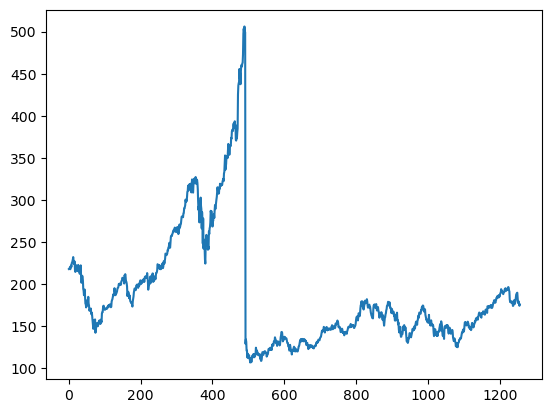

In [11]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [12]:
##Basics done, focus up
#LSTM are sensitive to the scale of the data, so we apply MinMax scaler

In [13]:
import numpy as np

In [14]:
df1

0       217.88
1       218.24
2       218.37
3       220.03
4       217.66
         ...  
1252    178.18
1253    179.36
1254    176.30
1255    174.21
1256    175.74
Name: close, Length: 1257, dtype: float64

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler =MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [17]:
df1.shape


(1257, 1)

In [18]:
df1

array([[0.27812148],
       [0.27902317],
       [0.27934878],
       ...,
       [0.17397621],
       [0.16874139],
       [0.17257358]])

In [19]:
#We have now collected the stock data now we move onto Preprocessing the data AKA training and testing
#The idea is we train the data set on the first half of the data and we test it on the latter half

In [20]:
#Splitting the data in to training and testing (Note that the training  isze is 65% of the total size)
training_size= int(len(df1)*0.65)
test_size= len(df1)-training_size
train_data,test_data= df1[0:training_size,:],df1[training_size:len(df1),:1]

In [21]:
training_size, test_size

(817, 440)

In [22]:
len(train_data), len(test_data)

(817, 440)

In [23]:
import numpy
#Convert an array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
    dataX, dataY = [],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return numpy.array(dataX), numpy.array(dataY)


In [24]:
time_step=100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [25]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [26]:
print(X_test.shape), print(y_test.shape)

(339, 100)
(339,)


(None, None)

In [27]:
#reshape input to be [samples, time_steps, feature] which is required for LSTM
X_train=X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0], X_test.shape[1],1)

In [28]:
###Create the stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [29]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
X_train[:100]

array([[[0.27812148],
        [0.27902317],
        [0.27934878],
        ...,
        [0.16881653],
        [0.16055103],
        [0.15922354]],

       [[0.27902317],
        [0.27934878],
        [0.28350657],
        ...,
        [0.16055103],
        [0.15922354],
        [0.15676894]],

       [[0.27934878],
        [0.28350657],
        [0.27757044],
        ...,
        [0.15922354],
        [0.15676894],
        [0.1604258 ]],

       ...,

       [[0.16881653],
        [0.16055103],
        [0.15922354],
        ...,
        [0.23283657],
        [0.23268629],
        [0.22812774]],

       [[0.16055103],
        [0.15922354],
        [0.15676894],
        ...,
        [0.23268629],
        [0.22812774],
        [0.23721979]],

       [[0.15922354],
        [0.15676894],
        [0.1604258 ],
        ...,
        [0.22812774],
        [0.23721979],
        [0.24017533]]])

In [35]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 18s 469ms/step - loss: 0.0454 - val_loss: 0.0013
Epoch 2/100
12/12 [==============================] - 4s 299ms/step - loss: 0.0170 - val_loss: 0.0042
Epoch 3/100
12/12 [==============================] - 3s 246ms/step - loss: 0.0115 - val_loss: 4.8534e-04
Epoch 4/100
12/12 [==============================] - 3s 244ms/step - loss: 0.0096 - val_loss: 4.7198e-04
Epoch 5/100
12/12 [==============================] - 3s 243ms/step - loss: 0.0089 - val_loss: 0.0016
Epoch 6/100
12/12 [==============================] - 3s 254ms/step - loss: 0.0080 - val_loss: 3.8427e-04
Epoch 7/100
12/12 [==============================] - 3s 250ms/step - loss: 0.0069 - val_loss: 3.0507e-04
Epoch 8/100
12/12 [==============================] - 3s 234ms/step - loss: 0.0057 - val_loss: 2.8015e-04
Epoch 9/100
12/12 [==============================] - 3s 258ms/step - loss: 0.0052 - val_loss: 2.9774e-04
Epoch 10/100
12/12 [==============================] - 3s 250ms/ste

12/12 [==============================] - 3s 254ms/step - loss: 0.0033 - val_loss: 2.9127e-04
Epoch 79/100
12/12 [==============================] - 3s 237ms/step - loss: 0.0029 - val_loss: 2.2012e-04
Epoch 80/100
12/12 [==============================] - 3s 230ms/step - loss: 0.0024 - val_loss: 2.1481e-04
Epoch 81/100
12/12 [==============================] - 3s 230ms/step - loss: 0.0020 - val_loss: 3.6783e-04
Epoch 82/100
12/12 [==============================] - 3s 233ms/step - loss: 0.0017 - val_loss: 2.2094e-04
Epoch 83/100
12/12 [==============================] - 3s 238ms/step - loss: 0.0014 - val_loss: 2.1501e-04
Epoch 84/100
12/12 [==============================] - 3s 232ms/step - loss: 0.0015 - val_loss: 2.7279e-04
Epoch 85/100
12/12 [==============================] - 3s 232ms/step - loss: 0.0015 - val_loss: 2.1524e-04
Epoch 86/100
12/12 [==============================] - 3s 229ms/step - loss: 0.0016 - val_loss: 2.4778e-04
Epoch 87/100
12/12 [==============================] - 3s 22

In [36]:
#NOw it is time to look towards making the stacked LSTM model
#We need to predict the test_data and plot the tests as output
#Then we will test it with the real world 

In [37]:
###Lets do the prediction and check performance metrics
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

11/11 [==============================] - 1s 45ms/step


In [38]:
##Transform to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [39]:
###Calculate RMSE perofrmance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

221.2217030606293

In [42]:
###Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

157.40502075935893

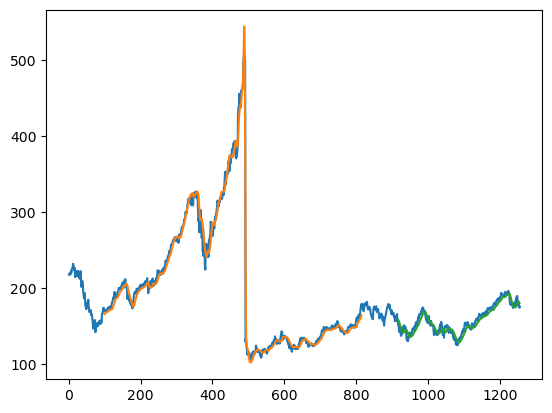

In [43]:
##Now we plot 
#Shift train predictions for plotting 
look_back=100

trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

#Shift test predictions for plotting 
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:,:] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

#plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [44]:
#Now we try to prdict the future
len(test_data)

440

In [45]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [46]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [47]:
temp_input #This is the previous 100 days

[0.14649968691296178,
 0.14259236067626796,
 0.14256731371321218,
 0.15421415153412643,
 0.15739511584220411,
 0.15716969317470253,
 0.1545397620538509,
 0.15180964308077638,
 0.1476518472135253,
 0.16713838447088286,
 0.16696305572949277,
 0.16262993112085156,
 0.16710081402629928,
 0.16758922980588598,
 0.16463368816530988,
 0.1633813400125234,
 0.1633813400125234,
 0.16493425172197868,
 0.17084533500313087,
 0.17112085159674384,
 0.1687163431433938,
 0.16210394489668123,
 0.16280525986224165,
 0.1656856606136506,
 0.17179711959924854,
 0.17648090169067,
 0.17635566687539134,
 0.1834690043832185,
 0.1856230432060112,
 0.18219160926737632,
 0.18126487163431432,
 0.1777833437695679,
 0.18467125860989347,
 0.18564809016906697,
 0.19273638071383836,
 0.1915341264871634,
 0.19313713212273004,
 0.19829680651221032,
 0.1955666875391358,
 0.1957921102066374,
 0.1931621790857858,
 0.2007764558547276,
 0.19997495303694424,
 0.19644333124608637,
 0.2034314339386349,
 0.2064120225422667,
 0.2072

In [50]:
from numpy import array

lst_output=[]
n_steps=100
i=0

while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input= x_input.reshape((1, n_steps, 1))
        
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.17816165]
101
1 day input [0.14259236 0.14256731 0.15421415 0.15739512 0.15716969 0.15453976
 0.15180964 0.14765185 0.16713838 0.16696306 0.16262993 0.16710081
 0.16758923 0.16463369 0.16338134 0.16338134 0.16493425 0.17084534
 0.17112085 0.16871634 0.16210394 0.16280526 0.16568566 0.17179712
 0.1764809  0.17635567 0.183469   0.18562304 0.18219161 0.18126487
 0.17778334 0.18467126 0.18564809 0.19273638 0.19153413 0.19313713
 0.19829681 0.19556669 0.19579211 0.19316218 0.20077646 0.19997495
 0.19644333 0.20343143 0.20641202 0.20726362 0.21823419 0.2144521
 0.21162179 0.21282405 0.20999374 0.20480902 0.20348153 0.20771446
 0.20964308 0.21001879 0.21828428 0.21763306 0.2210645  0.21613024
 0.21314966 0.21517846 0.21735755 0.21956168 0.21635567 0.22289292
 0.22444584 0.22232937 0.21475266 0.21122104 0.18822793 0.18036318
 0.18274264 0.17871008 0.17815905 0.1777082  0.18189105 0.17685661
 0.17465247 0.1682154  0.16944271 0.17282405 0.17630557 0.18604884
 0.17417658 0.17976205 0.18371947 

8 day output [[0.16859904]]
9 day input [0.16713838 0.16696306 0.16262993 0.16710081 0.16758923 0.16463369
 0.16338134 0.16338134 0.16493425 0.17084534 0.17112085 0.16871634
 0.16210394 0.16280526 0.16568566 0.17179712 0.1764809  0.17635567
 0.183469   0.18562304 0.18219161 0.18126487 0.17778334 0.18467126
 0.18564809 0.19273638 0.19153413 0.19313713 0.19829681 0.19556669
 0.19579211 0.19316218 0.20077646 0.19997495 0.19644333 0.20343143
 0.20641202 0.20726362 0.21823419 0.2144521  0.21162179 0.21282405
 0.20999374 0.20480902 0.20348153 0.20771446 0.20964308 0.21001879
 0.21828428 0.21763306 0.2210645  0.21613024 0.21314966 0.21517846
 0.21735755 0.21956168 0.21635567 0.22289292 0.22444584 0.22232937
 0.21475266 0.21122104 0.18822793 0.18036318 0.18274264 0.17871008
 0.17815905 0.1777082  0.18189105 0.17685661 0.17465247 0.1682154
 0.16944271 0.17282405 0.17630557 0.18604884 0.17417658 0.17976205
 0.18371947 0.19356293 0.20240451 0.20295554 0.20693801 0.20753914
 0.19053225 0.17713212 

16 day output [[0.16023251]]
17 day input [0.16493425 0.17084534 0.17112085 0.16871634 0.16210394 0.16280526
 0.16568566 0.17179712 0.1764809  0.17635567 0.183469   0.18562304
 0.18219161 0.18126487 0.17778334 0.18467126 0.18564809 0.19273638
 0.19153413 0.19313713 0.19829681 0.19556669 0.19579211 0.19316218
 0.20077646 0.19997495 0.19644333 0.20343143 0.20641202 0.20726362
 0.21823419 0.2144521  0.21162179 0.21282405 0.20999374 0.20480902
 0.20348153 0.20771446 0.20964308 0.21001879 0.21828428 0.21763306
 0.2210645  0.21613024 0.21314966 0.21517846 0.21735755 0.21956168
 0.21635567 0.22289292 0.22444584 0.22232937 0.21475266 0.21122104
 0.18822793 0.18036318 0.18274264 0.17871008 0.17815905 0.1777082
 0.18189105 0.17685661 0.17465247 0.1682154  0.16944271 0.17282405
 0.17630557 0.18604884 0.17417658 0.17976205 0.18371947 0.19356293
 0.20240451 0.20295554 0.20693801 0.20753914 0.19053225 0.17713212
 0.17868503 0.18164058 0.17397621 0.16874139 0.17257358 0.17816165
 0.17615911 0.1747566

25 day output [[0.15242782]]
26 day input [0.17635567 0.183469   0.18562304 0.18219161 0.18126487 0.17778334
 0.18467126 0.18564809 0.19273638 0.19153413 0.19313713 0.19829681
 0.19556669 0.19579211 0.19316218 0.20077646 0.19997495 0.19644333
 0.20343143 0.20641202 0.20726362 0.21823419 0.2144521  0.21162179
 0.21282405 0.20999374 0.20480902 0.20348153 0.20771446 0.20964308
 0.21001879 0.21828428 0.21763306 0.2210645  0.21613024 0.21314966
 0.21517846 0.21735755 0.21956168 0.21635567 0.22289292 0.22444584
 0.22232937 0.21475266 0.21122104 0.18822793 0.18036318 0.18274264
 0.17871008 0.17815905 0.1777082  0.18189105 0.17685661 0.17465247
 0.1682154  0.16944271 0.17282405 0.17630557 0.18604884 0.17417658
 0.17976205 0.18371947 0.19356293 0.20240451 0.20295554 0.20693801
 0.20753914 0.19053225 0.17713212 0.17868503 0.18164058 0.17397621
 0.16874139 0.17257358 0.17816165 0.17615911 0.17475665 0.17368081
 0.17272303 0.17176566 0.17076018 0.16970009 0.16859904 0.1674777
 0.16635633 0.1652516

In [58]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [59]:
import matplotlib.pyplot as plt

In [60]:
len(df1)

1257

In [61]:
df3 = df1.tolist()
df3.extend(lst_output)

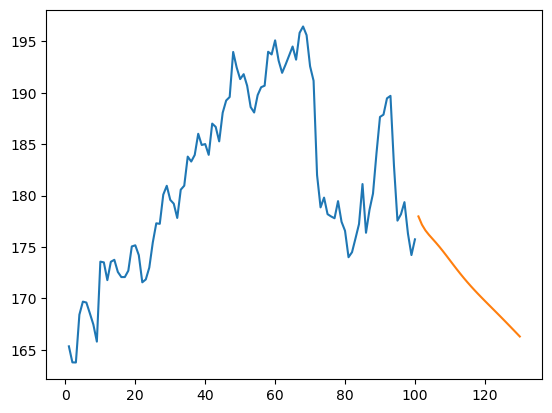

In [64]:
plt.plot(day_new, scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

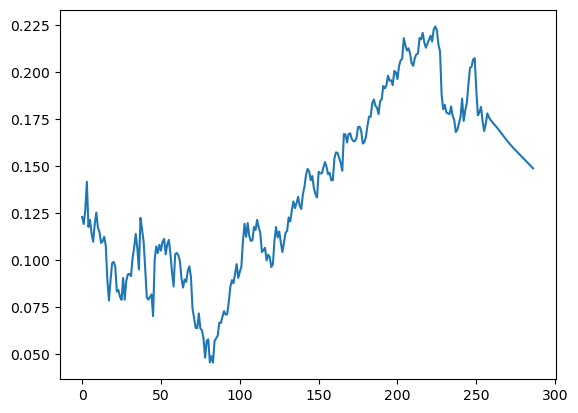

In [66]:
df3 = df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1000:])